# COSE474-2024F: Deep Learning HW1

2021100019 / 컴퓨터학과 / 양은서

## 0.1 Installation

In [1]:
!pip install d2l==1.0.3

## 2.1 Data Manipulation


### 2.1.1. Getting Started

In [2]:
import torch

In [3]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [4]:
x.numel()

12

In [5]:
x.shape

torch.Size([12])

In [6]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [7]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(3, 4)

tensor([[ 0.2179, -0.4906, -0.9465, -1.5708],
        [-0.1533,  0.1053,  0.0637,  0.1160],
        [ 1.8727,  0.2026, -0.4585,  1.0022]])

In [10]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2. Indexing and Slicing

In [11]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [12]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [13]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.3. Operations

In [14]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [15]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [17]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [18]:
X.sum()

tensor(66.)

### 2.1.4. Broadcasting

In [19]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [20]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5. Saving Memory

In [21]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [22]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 137852107812560
id(Z): 137852107812560


In [23]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6. Conversion to Other Python Objects

In [24]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [25]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.2 Data Preprocessing

### 2.2.1. Reading the Dataset

In [26]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [27]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2. Data Preparation

In [28]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [29]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3. Conversion to the Tensor Format

In [30]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
Y = torch.tensor(targets.to_numpy(dtype=float))
X, Y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 Linear Algebra

### 2.3.1. Scalars

In [31]:
import torch

In [32]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2. Vectors

$$ X = \begin{bmatrix}
x_1 \\
\vdots \\
x_n
\end{bmatrix}, $$

In [33]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [34]:
x[2]

tensor(2)

In [35]:
len(x)

3

In [36]:
x.shape

torch.Size([3])

### 2.3.3. Matrices

$$ A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix} .
 $$

In [37]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

$$ A^{T} = \begin{bmatrix}
a_{11} & a_{21} & \cdots & a_{m1} \\
a_{12} & a_{22} & \cdots & a_{m2} \\
\vdots & \vdots & \ddots & \vdots \\
a_{1n} & a_{2n} & \cdots & a_{nm}
\end{bmatrix} .
 $$

In [38]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [39]:
A = torch.tensor([[1,2,3], [2,0,4], [3,4,5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4. Tensors

In [40]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5. Basic Properties of Tensor Arithmetic

In [41]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

The elementwise product of two matrices is called their Hadamard product (denoted
 $ \odot $ ).

In [42]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [43]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6. Reduction

In [44]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [45]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [46]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [47]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [48]:
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [49]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [50]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7. Non-Reduction Sum

In [51]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [52]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [53]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 2.3.8. Dot Products

In [54]:
y = torch.ones(3, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [55]:
torch.sum(x * y)

tensor(3.)

### 2.3.9. Matrix-Vector Products

$$ Ax = \begin{bmatrix}
a_1^{T} \\
a_2^{T} \\
\vdots \\
a_m^{T}
\end{bmatrix}x = \begin{bmatrix}
a_1^{T}x \\
a_2^{T}x \\
\vdots \\
a_m^{T}x
\end{bmatrix}. $$

In [56]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 2.3.10. Matrix-Matrix Multiplication

In [57]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11. Norms

$$ \|\mathbf{x}\|_2 = \sqrt{Σ_{i=1}^{n} x_i^2}. $$

In [58]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

$$ \|\mathbf{x}\|_1 = \sum_{i=1}^{n} |x_i|. $$

In [59]:
torch.abs(u).sum()

tensor(7.)

In [60]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 2.5. Automatic Differentiation

### 2.5.1. A Simple Function

In [61]:
import torch

In [62]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [63]:
x.requires_grad_(True)
x.grad

In [64]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [65]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [66]:
x.grad == 4 * x

tensor([True, True, True, True])

To reset the gradient buffer, call
`
x.grad.zero_()
`



In [67]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [68]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3. Detaching Computation

In [69]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [70]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4. Gradients and Python Control Flow

In [71]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [72]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [73]:
a.grad == d / a

tensor(True)

## 3.1 Linear Regression

In [74]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

### 3.1.1. Basics & Memo
1. We assume that the relationship between features $x$ and target y is approximately linear.
2. Any such noise is well behaved, following a Gaussian distribution.

#### 3.1.1.1. Model

$$ y^̂ = w_1x_1 + ⋯ + w_dx_d+b. $$
$$ y^̂ = w^{T}x + b. $$

#### 3.1.1.2. Loss Function
- a measure of the quality of some given model

- Loss functions quantify the distance between the real and predicted values of the target.

$$ ||y-Xw||^{2} $$

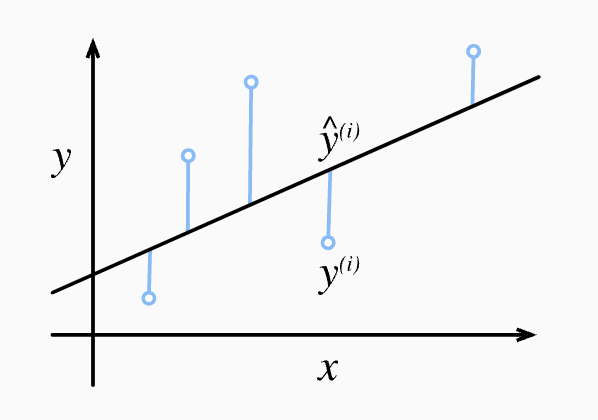

#### 3.1.1.3. Anayltic Solution

- optimal solution for the optimization problem

$$ w* = (X^{T}X)^{-1}X^{T}y $$

- Although analytic solutions allow for nice mathematical analysis, the requirement of an analytic solution is so restrictive that it would exclude almost all exciting aspects of deep learning.

#### 3.1.1.4. Minibatch Stochastic Gradient Descent

Memo

- **Gradient Descent**: iteratively reducing the error by updating the parameters in the direction that incrementally lowers the loss function
- **Stochastic Gradient Descent**
- **Minibatch Stochastic Gradient Descent** : (i) initialize the values of the model parameters, typically at random; (ii) iteratively sample random minibatches from the data, updating the parameters in the direction of the negative gradient.

#### 3.1.1.5. Predictions
- inference $\cong$ prediction

### 3.1.2. Vectorization for Speed

- Vectorizing code often yields order-of-magnitude speedups.

In [75]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [76]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.32190 sec'

In [77]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00016 sec'

### 3.1.3. The Normal Distribution and Squared Loss

$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{1}{2\sigma^2}(x - \mu)^2 \right).
 $$

In [78]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    x = torch.tensor(x)
    return p * torch.exp(-0.5 * (x - mu)**2 / sigma**2)

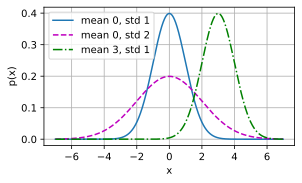

In [79]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### 3.1.4. Linear Regression as a Neural Network

Memo

- Linear regression is a single-layer neural network.
- input: feature dimensionality
- output: single numerical value

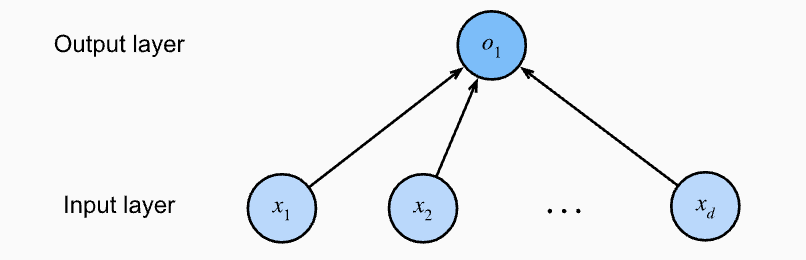

#### 3.1.4.1. Biology

Memo
The weighted inputs arriving from multiple sources are aggregated in the nucleus as a weighted sum $ y = Σ_i x_iw_i + b $, possibly subject to some nonlinear postprocessing via a function $σ(y)$.

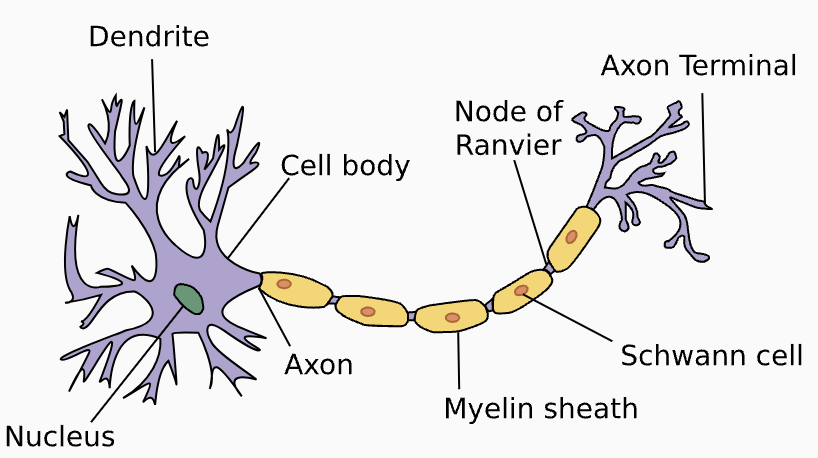

## 3.2 Object-Oriented Design for Implementation

In [80]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1. Utilities

In [81]:
def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [82]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [83]:
@add_to_class(A)
def do(self):
    print('Class attribute "b":', self.b)

a.do()

Class attribute "b": 1


In [84]:
class HyperParameters:
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [85]:
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [86]:
class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

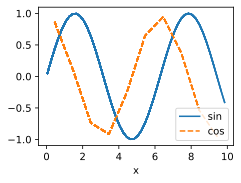

In [87]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2. Models

In [88]:
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3. Data

#### 3.2.3.1. Memo

A **data loader** is a (Python) generator that yields a data batch each time it is used. This batch is then fed into the `training_step` method of Module to compute the loss. There is an optional `val_dataloader` to return the validation dataset loader.

In [89]:
class DataModule(d2l.HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### 3.2.4. Training

In [90]:
class Trainer(d2l.HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

## 3.4 Linear Regression Implementation from Scratch

In [91]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1. Defining the Model

In [92]:
class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [93]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2. Defining the Loss Function

In [94]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3. Defining the Optimization Algorithm

In [95]:
class SGD(d2l.HyperParameters):
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [96]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4. Training

In [97]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:
                self.clip_gradient(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

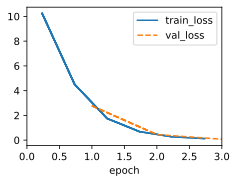

In [98]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [99]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0848, -0.2493])
error in estimating b: tensor([0.2762])


## 4.1 Softmax Regression

**survival modeling**: time-to-event modeling comes with a host of other complications that are dealt with in a specialized subfield

### 4.1.1. Classification

Memo

- do not come with natural orderings among the classes.
- **one-hot encoding**: simple way to represent categorical data
  - a vector with as many components as we have categories.

#### 4.1.1.1. Linear Model

$$ o_1 = x_1w_{11} + x_2w_{12} + x_3w_{13} + x_4w_{14} + b_1 $$
$$ o_2 = x_1w_{21} + x_2w_{22} + x_3w_{23} + x_4w_{24} + b_2 $$
$$ o_3 = x_1w_{31} + x_2w_{32} + x_3w_{33} + x_4w_{34} + b_3 $$

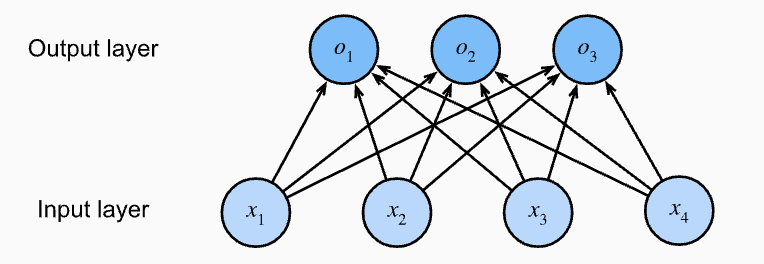

#### 4.1.1.2. The Softmax

Memo

- satisfy the requirement that the conditional class probability increases with increasing $o_i$, it is monotonic, and all probabilities are nonnegative. We can then transform these values so that they add up to $1$ by dividing each by their sum.

$$  ŷ = softmax(o) \\ where \ ŷ_{i} = \frac{exp(o_i)}{Σ_j exp(o_j)} $$

#### 4.1.1.3. Vectorization

$$ O = XW + b, $$
$$ Ŷ= \text{softmax(O)} $$

### 4.1.2. Loss Function

#### 4.1.2.1. Log-Likelihood

$$ l(y, ŷ) = - Σ^q_{j=1} y_j logŷ_j. $$

#### 4.1.2.2. Softmax and Cross-Entropy Loss

$$ \partial o_j l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^{q} \exp(o_k)} - y_j = \text{softmax}(\mathbf{o})_j - y_j.
$$

### 4.1.3. Information Theory Basics

#### 4.1.3.1. Entropy

$$ H[P] = Σ_j - P(j)\text{log}P(j) . $$

## 4.2. The Image Classification Dataset

In [100]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1. Loading the Dataset

Fashion-MNIST: contains images of 10 categories of clothing at
$28 \times 28$ pixels resolution.

In [101]:
class FashionMNIST(d2l.DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [102]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:07<00:00, 3413602.93it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209111.21it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3864102.96it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15141849.22it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [103]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [104]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2. Reading a Minibatch

In [105]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [106]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [107]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'8.83 sec'

### 4.2.3. Visualization

In [108]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    return NotImplementedError

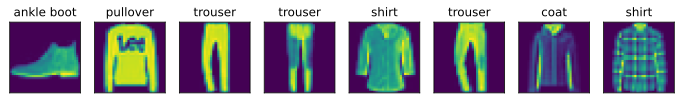

In [109]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## 4.3. The Base Classification Model

In [110]:
import torch
from d2l import torch as d2l

### 4.3.1. The Classifier Class

In [111]:
class Classifier(d2l.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [112]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2. Accuracy

In [113]:
@d2l.add_to_class(Classifier)
def accuracy(self,Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

## 4.4. Softmax Regression Implementation from Scratch

In [114]:
import torch
from d2l import torch as d2l

### 4.4.1. The Softmax

In [115]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

#### 4.4.1.1. Memo
- softmax: mapping from scalars to probabilities

$$ softmax(X)_{ij} = \frac{exp(X_{ij})}{Σ_{k}exp(X_{ik})} $$

- 분모: partition function

In [116]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [117]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1447, 0.2572, 0.1398, 0.1418, 0.3165],
         [0.2065, 0.2138, 0.2277, 0.1499, 0.2020]]),
 tensor([1., 1.]))

### 4.4.2. The Model

#### 4.4.2.1. Memo
- 28 $ \times $ 28 pixel images -> flatten each image 784 $ \times $ 1
- output 개수 = class 개수  

In [118]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [119]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3. The Cross-Entropy Loss

#### 4.4.3.1. Memo
- The Cross-Entropy Loss: DL에서 가장 흔한 손실 함수
- cross-entropy takes the negative log-likelihood of the predicted probability

In [120]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [121]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [122]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4. Training

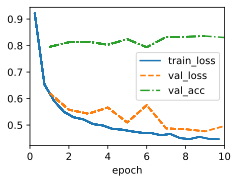

In [123]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5. Prediction

In [124]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

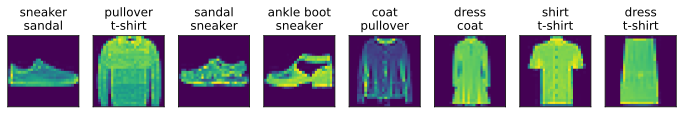

In [125]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]

data.visualize([X, y], labels=labels)

## 5.1. Multilayer Perceptrons

In [126]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 5.1.1. Hidden Layers

#### 5.1.1.1. Limitations of Linear Models

Memo

- linearity : feature가 증가하면 model output도 항상 일정한 방향으로 변화하는 것을 의미
  - 그러나 실제로는 비선형적 관계가 더 보편적
  => weaker assumption of **monotonicity**


#### 5.1.1.2. Incorporating Hidden Layers

- linear model의 한계를 극복하는 방법: incorporating one or more hidden layers.
  - to stack many fully connected layers on top of one another.
   
   => **multilayer perceptron MLP**

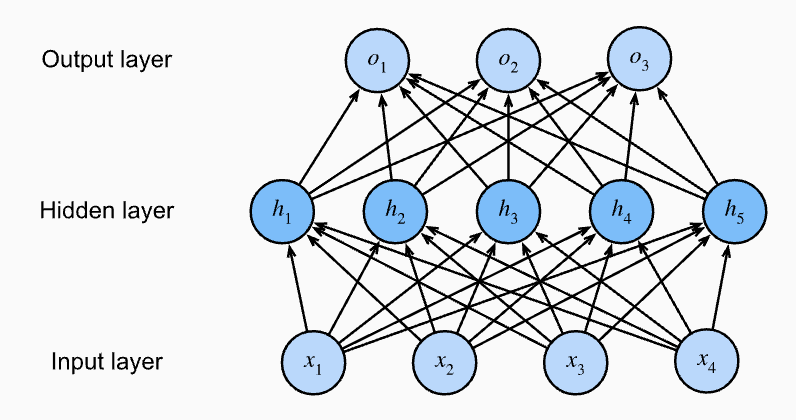

#### 5.1.1.3. From Linear to Nonlinear

MLP의 주요 components
- input matrix: $ n × d $
- Hidden representations

$$ H = XW^{(1)} + b^{(1)} $$

- outputs of the one-hidden-layer MLP

$$ O = HW^{(2)} + b^{(2)} $$

- nonlinear activation function σ
  - 각각의 hidden unit에 적용된다.
  - 대표적인 예시: ReLU (rectified linear unit)
  - no longer possible to collapse MLP into a linear model

$$ H = σ( X W^{(1)} + b^{(1)}) $$
$$ O = HW^{(2)} + b^{(2)} $$


#### 5.1.1.4. Universal Approximators

- hidden layer가 1층인 Neural Network만으로도 대부분의 함수를 모델링할 수 있다.

- 하지만, 실제로 그것을 학습하는 것은 어렵다.
  - we can approximate many functions much more compactly by using deeper (rather than wider) networks.

### 5.1.2. Activation Functions

#### 5.1.2.1. ReLU Function

$$ ReLU(x) = max(x, 0) $$

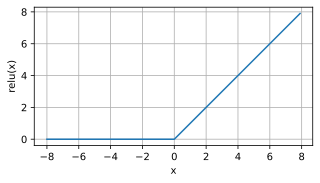

In [127]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

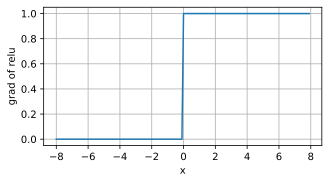

In [128]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### 5.1.2.2. Sigmoid Function

- "squashing function"
- (-∞, ∞) 범위의 Input -> (0, 1) output으로 squash
  - binary classification problem에 대해서 output을 확률로써 해석하고자 할 때 sigmoid를 활용


$$ sigmoid(x) = \frac{1}{1 + exp(-x)} $$

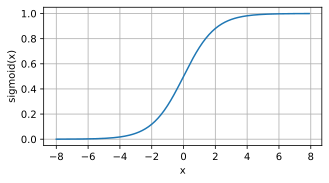

In [129]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

$$ \frac{d}{dx} sigmoid(x) = \frac{exp(-x)}{(1+exp(-x))^{2}} = sigmoid(x) (1-sigmoid(x)) $$

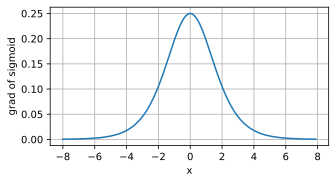

In [130]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 5.1.2.3. Tanh Function

- **tanh (hyperbolic tangent) function**: transforming inputs into elements on the interval between -1 and 1.

$$ tanh(x) = \frac{1-exp(-2x)}{1+exp(-2x)} $$

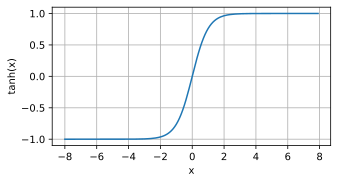

In [131]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

$$ \frac{d}{dx} tanh(x) = 1- tanh^{2}(x) $$

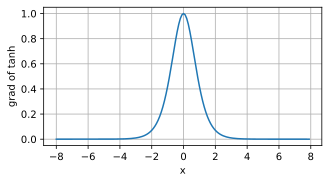

In [132]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 5.2. Implementation of Multilayer Perceptrons

In [133]:
import torch
from torch import nn
from d2l import torch as d2l

### 5.2.1. Implementation from Scratch

#### 5.2.1.1. Initializing Model Parameters

Memo

- model: one hidden layer & 256 hidden units
  - layer 수와 그 너비는 모두 hyperparameters에 해당
  - width는 2의 제곱수로 결정한다.

In [134]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 5.2.1.2. Model

In [135]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [136]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### 5.2.1.3. Training

training loop가 softmax regression과 닮아있다.

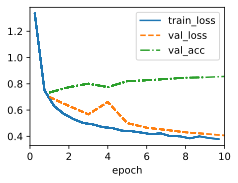

In [137]:
model = MLPScratch(num_inputs=28*28, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2. Concise Implementation

#### 5.2.2.1. Model

In [138]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                nn.ReLU(), nn.LazyLinear(num_outputs))

#### 5.2.2.2. Training

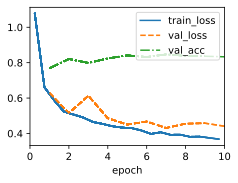

In [139]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

### 5.3.1. Forward Propagation

calculation and storage of intermediate variables (including outputs) for a neural network in order from the input layer to the output layer.
- hidden layer는 bias term을 포함하지 않는다.

- intermediate variable
$$ z = W^{1}x, $$

- activation function을 통과시켜 hidden activation vector를 갖는다.
$$ h = ϕ(z), $$

- h 또한 intermediate variable
- output layer variable

$$ o = W^{2}h, $$

- $l$ : loss function, calculate the loss term for a single data
$$ L = l(o, y), $$

- $l_2$ regularization term
$$ s = \frac{λ}{2} (||W^{(1)}||^{2}_F + ||W^{(2)}||^{2}_F), $$

- J: objective function
$$ J = L+s $$

### 5.3.2. Computational Graph of Forward Propagation

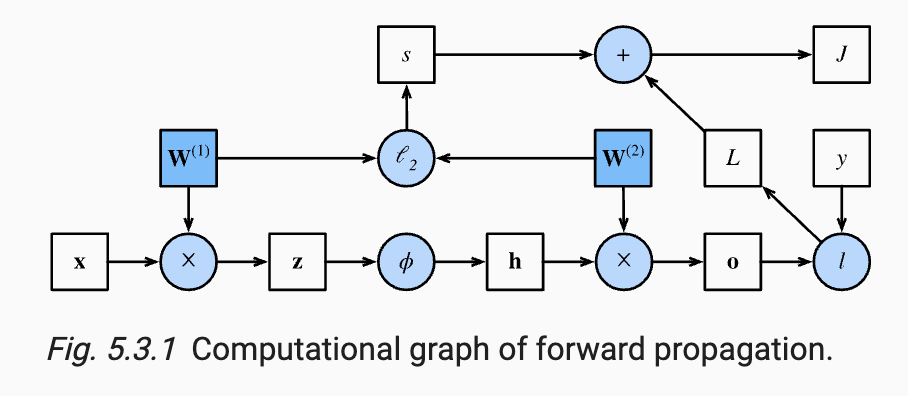

### 5.3.3. Backpropagation

- method of calculating the gradient of neural network parameters **in reverse order**

$$ \frac{∂Z}{∂X} = prod(\frac{∂Z}{∂Y}, \frac{∂Y}{∂X}) $$

- model parameters closest to the input layer

$$ \frac{∂J}{∂W^{(1)}} = prod(\frac{∂J}{∂z}, \frac{∂z}{∂W^{(1)}}) + prod(\frac{∂J}{∂s}, \frac{∂s}{∂W^{(1)}}) = \frac{∂J}{∂x} x^{T} + λW^{(1)}. $$

### 5.3.4. Training Neural Networks

Memo

- 일단 모델 파라미터가 초기화되면, forward propagation을 backpropagation으로 대체한다.
- training requires more memory than plain prediction.
  - backpropagation 과정에서는 이전의 gradient들을 모두 활용하기 때문에 이를 메모리에 저장하고 있어야 한다.

# Discussions & Exercises

### 2.1.7. Summary
Data Manipulation: indexing and slicing, basic mathematics operations, broadcasting, memory-efficient assignment, and conversion to and from other Python objects.

### 2.1.8. Exercises

In [140]:
# 1. Change the conditional statement X == Y to X < Y or X > Y,
# and then see what kind of tensor you can get.

X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X < Y, X > Y

(tensor([[ True, False,  True, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

In [141]:
# 2. Replace the two tensors that operate by element in the broadcasting
# mechanism with other shapes, e.g., 3-dimensional tensors.
# Is the result the same as expected?

a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b, a + b, a - b, a**b, a * b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]),
 tensor([[ 0, -1],
         [ 1,  0],
         [ 2,  1]]),
 tensor([[1, 0],
         [1, 1],
         [1, 2]]),
 tensor([[0, 0],
         [0, 1],
         [0, 2]]))

### 2.2.2. Summary

NaN: missing values "bed bugs" might be handled either via imputation or deletion.
- **Categorical input fields**: treat NaN as a category.
- **Numerical input values**: replace the NaN entries with the mean value of the corresponding column.

### 2.2.4. Discussion
Finally, we must pay attention to data quality. Real-world datasets are often plagued by outliers, faulty measurements from sensors, and recording errors, which must be addressed before feeding the data into any model.

### 2.2.5. Exercises

In [142]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [143]:
Thresh=max(data.isnull().sum(axis=0))
print(Thresh)

3


In [144]:
pro_data=data.dropna(axis=1,thresh=data.shape[0]-Thresh+1)
print(pro_data)

   NumRooms   Price
0       NaN  127500
1       2.0  106000
2       4.0  178100
3       NaN  140000


#### 2.3.4.1. Summary
- Tensors give us a generic way of describing extensions to $ n^{th} $-order arrays.

- Tensors will become more important when we start working with images. Each image arrives as a $3^{rd}$-order tensor with axes corresponding to the height, width, and channel.

### 2.3.12. Discussion & Summary
- Scalars, vectors, matrices, and tensors are the basic mathematical objects used in linear algebra and have zero, one, two, and an arbitrary number of axes, respectively.
- Elementwise products are called Hadamard products. By contrast, dot products, matrix–vector products, and matrix–matrix products are not elementwise operations and in general return objects having shapes that are different from the the operands.

### 2.3.13. Exercises

In [145]:
# 1. Prove that the transpose of the transpose of a matrix is the matrix itself:
# A.T.T = A

A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
A.T.T == A

tensor([[True, True, True],
        [True, True, True]])

In [146]:
# 2. Given two matrices A and B, show that sum and transposition commute:
# A.T + B.T = (A+B).T

A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = torch.ones(6, dtype=torch.float32).reshape(2, 3)
A.T + B.T == (A+B).T

tensor([[True, True],
        [True, True],
        [True, True]])

In [147]:
# 4. We defined the tensor X of shape (2, 3, 4) in this section.
# What is the output of len(X)? Write your answer without implementing any code,
# then check your answer using code.

X = torch.arange(24).reshape(2, 3, 4)
len(X)

2

In [148]:
# 8. Consider a tensor of shape (2, 3, 4).
# What are the shapes of the summation outputs along axes 0, 1, and 2?

X = torch.arange(24).reshape(2, 3, 4)
X.shape, X.sum(axis=0).shape, X.sum(axis=1).shape, X.sum(axis=2).shape

(torch.Size([2, 3, 4]),
 torch.Size([3, 4]),
 torch.Size([2, 4]),
 torch.Size([2, 3]))

In [149]:
# 10. Consider three large matrices, say A, B, and C, initialized with Gaussian
# Random variables.

A = torch.randn( (2 ** 10, 2 ** 16) )
B = torch.randn( (2 ** 16, 2 ** 5) )
C = torch.randn( (2 ** 5, 2 ** 16) )

%time

temp = (A @ B) @ C
temp

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


tensor([[ -367.1152,  2401.7786,  1724.3992,  ...,  -382.5339,   800.7084,
            51.7312],
        [-1866.3217,  1340.4690,   812.5150,  ..., -1101.4291,   904.4568,
          1053.0220],
        [ 2314.6824,  1235.2440,  3806.1355,  ...,  -522.6499,  1485.2560,
           620.3669],
        ...,
        [-1802.4875, -1252.6062, -1324.4215,  ...,  2959.4285, -3001.5308,
          -948.4785],
        [-1431.5286,  -551.1678, -1503.8882,  ...,   125.5817,  -720.1617,
          1360.9752],
        [  621.7579,   187.7166,  1287.3070,  ..., -4926.0527,  3197.2075,
          -996.8781]])

#### 2.5.2.1. Summary
- Because deep learning frameworks vary in how they interpret gradients of non-scalar tensors, PyTorch takes some steps to avoid confusion. Invoking backward on a non-scalar elicits an error unless we tell PyTorch how to reduce the object to a scalar.

#### 2.5.3.1. Summary
- One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable.

#### 2.5.4.1. Summary
- One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable.

### 2.5.5. Summary
- power of automatic differentiation
- Auto gradient lets us design massive models for which pen and paper gradient computations would be prohibitively time consuming.

#### 3.1 Normal Distribution My Own Exercise


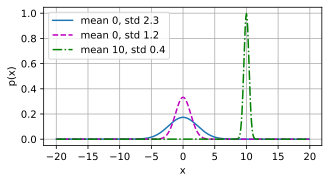

In [150]:
x = np.arange(-20, 20, 0.1)

params = [(0, 2.3), (0, 1.2), (10, 0.4)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

### 3.1.5. Summary

- **Traditional Linear Regression**: parameters of a linear function are chosen to minimize squared loss on the training set
- **model components**: parametric forms, differentiable objectives, optimization via minibatch stochastic gradient descent, and ultimately, evaluation on previously unseen data.

#### 3.2.1. My Own Exercise


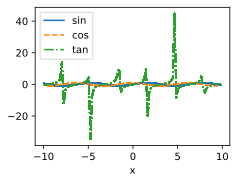

In [151]:
board = d2l.ProgressBoard('x')
for x in np.arange(-10, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)
    board.draw(x, np.tan(x), 'tan', every_n=2)

### 3.2.5. My Own Exercise


In [152]:
## epoch 최적화 함수 메소드 추가
@add_to_class(Trainer)
def fit_epoch(self):
        self.model.train()
        for batch in self.train_dataloader:
            self.optim.zero_grad()
            # Forward pass
            batch = {k: v.to(self.device) for k, v in batch.items()}
            loss = self.model.training_step(batch)

            # Backward pass
            loss.backward()

            # Gradient clipping
            if self.gradient_clip_val > 0:
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.gradient_clip_val)

            # Optimizer step
            self.optim.step()

In [153]:
## validate 메소드 추가
@add_to_class(Trainer)
def validate(self):
        self.model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in self.val_dataloader:
                batch = {k: v.to(self.device) for k, v in batch.items()}
                loss = self.model.validation_step(batch)
                val_loss += loss.item()

        val_loss /= len(self.val_dataloader)
        print(f"Validation loss at epoch {self.epoch}: {val_loss}")
        return val_loss

### 3.4.1. Summary

Components of linear regression

(i) the model \
(ii) the loss function \
(iii) a minibatch stochastic gradient descent optimizer \
(iv) the training function

### 3.4.5. Summary & My Own Exercise
- design deep learning systems by implementing a fully functional neural network model and training loop
- data loader, model, loss function, an optimization procedure, and a visualization and monitoring tool

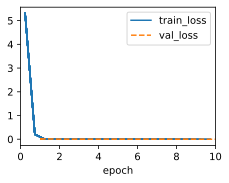

In [154]:
# 이 모델에서는 learning rate를 0.1로 키우면서 error가 줄어드는 것을 알 수 있다.
# optimal point가 나타나는 시점은 동일하다.
model = LinearRegressionScratch(2, lr=0.1)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [155]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([-0.0016, -0.0005])
error in estimating b: tensor([-0.0003])


#### 4.1.1.3. Discussion
- softmax를 ML 학습 중 어느 단계에 적용하는 걸까요?
- DL의 output으로 nonnegative한 결과를 도출하는 것이 중요한 이유가 무엇인가요?

### 4.2.4. Summary
- **Fashion-MNIST**: apparel classification dataset consisting of images representing 10 categories
- **data iterator**: a key component for efficient performance

#### 4.3.3. Summary
- Classification에서 가장 중요한 것: **accuracy** of the classifier
- validation_step: report loss value, accuracy
  - can generate averaged loss and accuracy
- accuracy: fraction of all predictions that are collect
  - often difficult to optimize accuracy directly

#### 4.4.2.1. Summary
- 28 $ \times $ 28 pixel images -> flatten each image 784 $ \times $ 1
- output 개수 = class 개수  

### 4.4.6. Summary & My Own Exercises

- Experiment with the hyperparameters of the code

In [162]:
# Modified class with parameterized learning rate
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)
        self.lr = lr

    def parameters(self):
        return [self.W, self.b]

    def forward(self, X):
        X = X.reshape((-1, self.W.shape[0]))
        return softmax(torch.matmul(X, self.W) + self.b)

In [163]:
# Function to train with different learning rates
def train_with_lr(lr_values, batch_size=256, num_epochs=10):
    for lr in lr_values:
        data = d2l.FashionMNIST(batch_size=batch_size)  # Load FashionMNIST data with batch_size
        model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=lr)
        trainer = d2l.Trainer(max_epochs=num_epochs)  # Pass optimizer to trainer
        print(f"Training with learning rate: {lr}")
        trainer.fit(model, data)

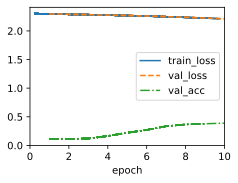

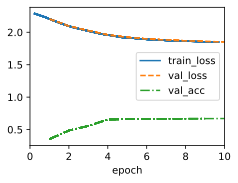

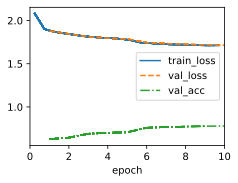

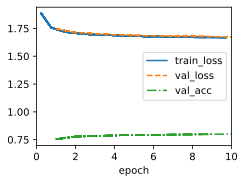

In [164]:
# Experiment with different learning rates
lr_values = [0.001, 0.01, 0.1, 0.5]
train_with_lr(lr_values)

#### 5.1.2.1 (Exercise) My own exercise

- parametrized ReLU function
- variation adds a linear term to ReLU -> argument가 음수라고 하더라도 정보를 잘 포함할 수 있도록 하기 위함

$$ pReLU(x) = max(0, x) + \alpha min(0, x) $$

In [174]:
pReLU = lambda x, a: torch.max(torch.tensor(0), x) + a * torch.min(torch.tensor(0), x)

In [175]:
y = pReLU(x=x, a=0.1)

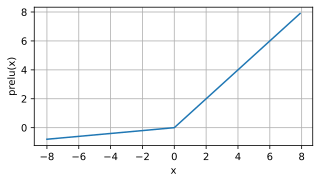

In [176]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
d2l.plot(x.detach(), y.detach(), 'x', 'prelu(x)', figsize=(5, 2.5))

### 5.1.3. Summary and Discussion

ReLU is significantly more amenable to optimization than the sigmoid or the tanh function.

### 5.2.3. Summary
Note, though, that implementing MLPs from scratch is nonetheless messy: naming and keeping track of the model parameters makes it difficult to extend models.

### 5.3.5. Summary

- **Forward propagation**: sequentially calculates and stores intermediate variables within the computational graph defined by the neural network.

- **Backpropagation**: sequentially calculates and stores the gradients of intermediate variables and parameters within the neural network in the reversed order.